In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('transactions_data.xlsx')
df.head()

,SALE_DATE,MODEL_YEAR,MAKE_NAME,MODEL_NAME,VEHICLE_NAME,SEGMENT,DATA_SOURCE,SALE_PRICE_AMOUNT,MSRP_AMOUNT,MILEAGE,...,DRIVETRAIN_DESCRIPTION,BEDLENGTH,BODY_STYLE,CAB_CONFIGURATION,DOOR_COUNT,TRUCK_FLG,TRANSACTION_GEOGRAPHY_ID,CITY_DISPLAY_NAME,STATE,SALE_TYPE
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,FWD,NaN,Wagon,NaN,4,NaN,37654,Montpelier,VT,Retail
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,AWD,NaN,SUV,NaN,4,NaN,35015,Corpus Christi,TX,Retail
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,FWD,NaN,Sedan,NaN,4,NaN,36058,Georgetown,TX,Retail
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,FWD,NaN,Sedan,NaN,4,NaN,36567,Humble,TX,Retail
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,AWD,NaN,SUV,NaN,4,NaN,19160,Rochester,MN,Retail


In [6]:
df.columns = df.columns.map(str.lower)
df.columns

Index(['sale_date', 'model_year', 'make_name', 'model_name', 'vehicle_name',
       'segment', 'data_source', 'sale_price_amount', 'msrp_amount', 'mileage',
       'days_in_inventory', 'transmission_description',
       'transmission_num_of_speeds', 'transmission_type', 'engine_description',
       'engine_cylinders', 'engine_displacement', 'engine_subtype',
       'engine_type', 'drivetrain_description', 'bedlength', 'body_style',
       'cab_configuration', 'door_count', 'truck_flg',
       'transaction_geography_id', 'city_display_name', 'state', 'sale_type'],
      dtype='object')

In [8]:
df.segment.value_counts()

Compact SUV Crossover     425
Midsize SUV Crossover     330
Truck                     286
Compact Car               283
Midsize Car               217
Fullsize SUV Crossover     91
Near Luxury Car            68
Fullsize Car               53
Midsize Truck              47
Van                        34
Subcompact Car             33
Midsize Luxury Car         31
Pony Car                   27
Compact Sports Car         17
Compact Luxury Car         13
High Performance           11
High End Luxury Car        10
Minivan                     9
Import Sports Car           9
Sports Car                  5
Exotic                      1
Name: segment, dtype: int64

In [93]:
df.isnull().sum()

sale_date                      0
model_year                     0
make_name                      0
model_name                     0
vehicle_name                   0
segment                        0
data_source                    0
sale_price_amount              0
msrp_amount                    0
mileage                        0
days_in_inventory              0
transmission_description       0
transmission_num_of_speeds     0
transmission_type              0
engine_description             0
engine_cylinders               0
engine_displacement            0
engine_type                    0
drivetrain_description         0
body_style                     0
door_count                     0
transaction_geography_id       0
city_display_name             14
state                          0
sale_type                      0
dtype: int64

In [44]:
df = df.drop(['engine_subtype', 'bedlength', 'cab_configuration', 'truck_flg'], axis=1)

In [36]:
df.loc[:, 'days_in_inventory'] = df.days_in_inventory.fillna(value=df.days_in_inventory.mean())
df.loc[:, 'transmission_type'] = df.transmission_type.fillna(value='Automatic')
df.transmission_type.value_counts()

Automatic    1913
Manual         87
Name: transmission_type, dtype: int64

In [51]:
df_reg = df.loc[(df.transmission_num_of_speeds.isnull() & df.transmission_description.str.contains('\d')), ['transmission_description', 'transmission_num_of_speeds']]

In [70]:
df_reg.loc[:, 'transmission_num_of_speeds'] = df_reg.transmission_description.str.extract('(\d)')
df_reg

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,transmission_description,transmission_num_of_speeds
47,"Automatic, 8-Spd w/CommandShift & Sport Mode",8
58,"Automatic, 9-Spd",9
93,"Automatic, 8-Spd Sport",8
105,"Automatic, 8-Spd w/Paddle Shift",8
118,"Automatic, 9-Spd",9
128,"Automatic, 8-Spd Sport",8
139,"Automatic, 9-Spd",9
192,"Automatic, 8-Spd Sport",8
221,"Automatic, 8-Spd Sport",8
233,"Automatic, 8-Spd w/Paddle Shift",8


In [84]:
df.loc[df.transmission_num_of_speeds.isnull(), ['transmission_num_of_speeds']] = 1

0

In [89]:
df.loc[df.engine_cylinders.isnull(), ['engine_cylinders']] = 0
df.loc[df.engine_displacement.isnull(), 'engine_displacement'] = 0

In [99]:
df = df.dropna(subset=['city_display_name'])
df.shape

(1986, 25)

In [11]:
df[df.days_in_inventory.isnull()]

,sale_date,model_year,make_name,model_name,vehicle_name,segment,data_source,sale_price_amount,msrp_amount,mileage,...,drivetrain_description,bedlength,body_style,cab_configuration,door_count,truck_flg,transaction_geography_id,city_display_name,state,sale_type
8,2016-12-31,2017,Mazda,MAZDA3,Touring Sedan 4D,Compact Car,CDK,21000.00,24130,12,...,FWD,NaN,Sedan,NaN,4,NaN,3577,San Jose,CA,Retail
71,2016-12-31,2017,Audi,A6,3.0T Premium Plus Sedan 4D,Midsize Luxury Car,CDK,59322.00,63435,48,...,AWD,NaN,Sedan,NaN,4,NaN,40841,Appleton,WI,Retail
88,2016-12-31,2017,Mazda,MAZDA3,Touring 2.5 Hatchback 4D,Compact Car,CDK,23250.00,24880,68,...,FWD,NaN,Hatchback,NaN,4,NaN,3222,San Jose,CA,Retail
100,2016-12-31,2016,Mitsubishi,Outlander,ES Sport Utility 4D,Compact SUV Crossover,AutoNation,23103.00,23845,13,...,2WD,NaN,SUV,NaN,4,NaN,38946,Liberty Lake,WA,Retail
118,2016-12-31,2016,FIAT,500X,Easy Sport Utility 4D,Compact SUV Crossover,LITHIA,23530.00,25530,111,...,FWD,NaN,SUV,NaN,4,NaN,0,NaN,--,Retail
127,2016-12-31,2016,Land Rover,Range Rover Sport,Supercharged Dynamic Sport Utility 4D,Midsize SUV Crossover,AutoNation,88998.87,92747,483,...,4WD,NaN,SUV,NaN,4,NaN,16569,Rockville,MD,Retail
149,2016-12-31,2017,Jeep,Wrangler,Sport SUV 2D,Midsize SUV Crossover,CDK,33685.00,33685,100,...,4WD,NaN,SUV,NaN,2,NaN,4559,Newark,CA,Retail
165,2016-12-31,2016,Nissan,Sentra,S Sedan 4D,Compact Car,LITHIA,17557.31,19040,5,...,FWD,NaN,Sedan,NaN,4,NaN,2489,Fresno,CA,Retail
214,2016-12-31,2016,Dodge,Dart,SXT Sport Sedan 4D,Compact Car,LITHIA,22487.00,21185,9,...,FWD,NaN,Sedan,NaN,4,NaN,39253,Kennewick,WA,Retail
279,2016-12-31,2017,Subaru,Outback,3.6R Limited Wagon 4D,Midsize Car,VIN_SOLUTIONS,32999.41,37072,0,...,AWD,NaN,SUV,NaN,4,NaN,39471,Seattle,WA,Retail


In [100]:
df.isnull().sum()

sale_date                     0
model_year                    0
make_name                     0
model_name                    0
vehicle_name                  0
segment                       0
data_source                   0
sale_price_amount             0
msrp_amount                   0
mileage                       0
days_in_inventory             0
transmission_description      0
transmission_num_of_speeds    0
transmission_type             0
engine_description            0
engine_cylinders              0
engine_displacement           0
engine_type                   0
drivetrain_description        0
body_style                    0
door_count                    0
transaction_geography_id      0
city_display_name             0
state                         0
sale_type                     0
dtype: int64

In [311]:
df.dtypes

sale_date                     datetime64[ns]
model_year                             int32
make_name                             object
model_name                            object
vehicle_name                          object
segment                               object
data_source                           object
sale_price_amount                    float64
msrp_amount                            int64
mileage                                int64
days_in_inventory                    float64
transmission_num_of_speeds             int32
transmission_type                     object
engine_cylinders                     float64
engine_displacement                  float64
engine_type                           object
drivetrain_description                object
body_style                            object
door_count                             int64
city_display_name                     object
state                                 object
sale_type                             object
transmissi

In [276]:
df.engine_type.value_counts()

Gas              1706
Flexible Fuel     130
Hybrid             76
Diesel             71
Electric            3
Name: engine_type, dtype: int64

In [310]:
eng_dum = pd.get_dummies(df.engine_type)
df = pd.concat([df, eng_dum], axis=1)
df.head()

,sale_date,model_year,make_name,model_name,vehicle_name,segment,data_source,sale_price_amount,msrp_amount,mileage,...,door_count,city_display_name,state,sale_type,transmission_type_std,Diesel,Electric,Flexible Fuel,Gas,Hybrid
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,4,Montpelier,VT,Retail,0,0,0,0,1,0
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,4,Corpus Christi,TX,Retail,0,0,0,0,1,0
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,4,Georgetown,TX,Retail,0,0,0,0,1,0
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,4,Humble,TX,Retail,0,0,0,0,1,0
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,4,Rochester,MN,Retail,0,0,0,0,1,0


In [269]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['transmission_type_std'] = le.fit_transform(df.transmission_type.values)

In [260]:
df.transmission_num_of_speeds = df.transmission_num_of_speeds.astype(int)

In [109]:
df = df.drop(['transmission_description', 'engine_description', 'transaction_geography_id'], axis=1)

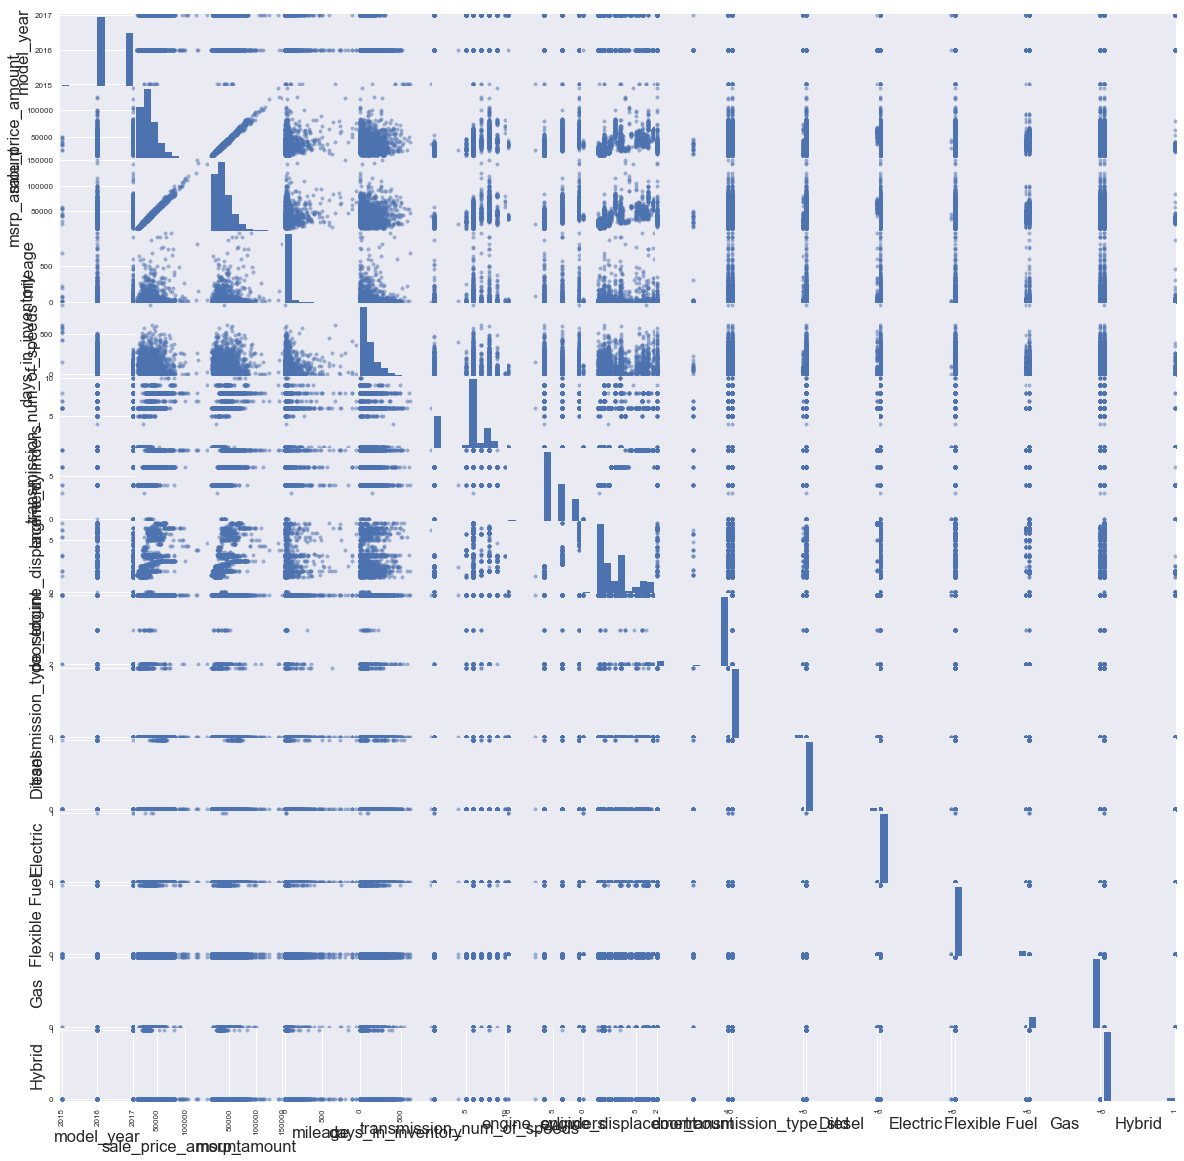

In [312]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20));

In [314]:
df.columns

Index(['sale_date', 'model_year', 'make_name', 'model_name', 'vehicle_name',
       'segment', 'data_source', 'sale_price_amount', 'msrp_amount', 'mileage',
       'days_in_inventory', 'transmission_num_of_speeds', 'transmission_type',
       'engine_cylinders', 'engine_displacement', 'engine_type',
       'drivetrain_description', 'body_style', 'door_count',
       'city_display_name', 'state', 'sale_type', 'transmission_type_std',
       'Diesel', 'Electric', 'Flexible Fuel', 'Gas', 'Hybrid'],
      dtype='object')

In [315]:
cols = ['Diesel','Electric','Flexible Fuel', 'Gas', 'Hybrid','transmission_type_std','door_count', 'engine_displacement', 'engine_cylinders', 'days_in_inventory', 'mileage', 'msrp_amount', 'model_year', 'sale_price_amount']

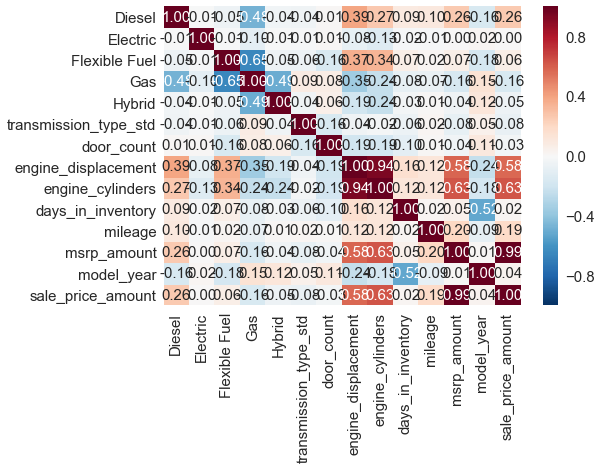

In [316]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)

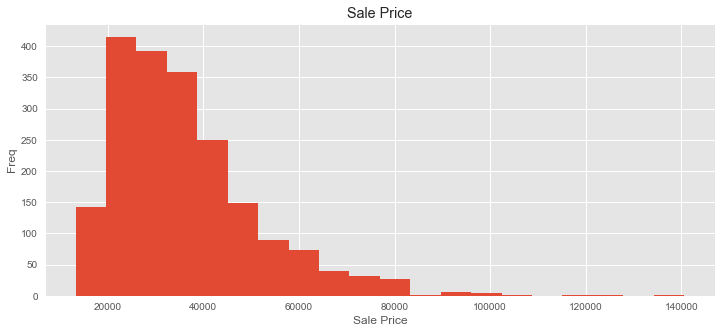

In [217]:
fig, ax = plt.subplots(figsize=(12,5))

ax.hist(df.sale_price_amount, 20)

plt.xlabel('Sale Price')
plt.ylabel('Freq')
plt.title('Sale Price');

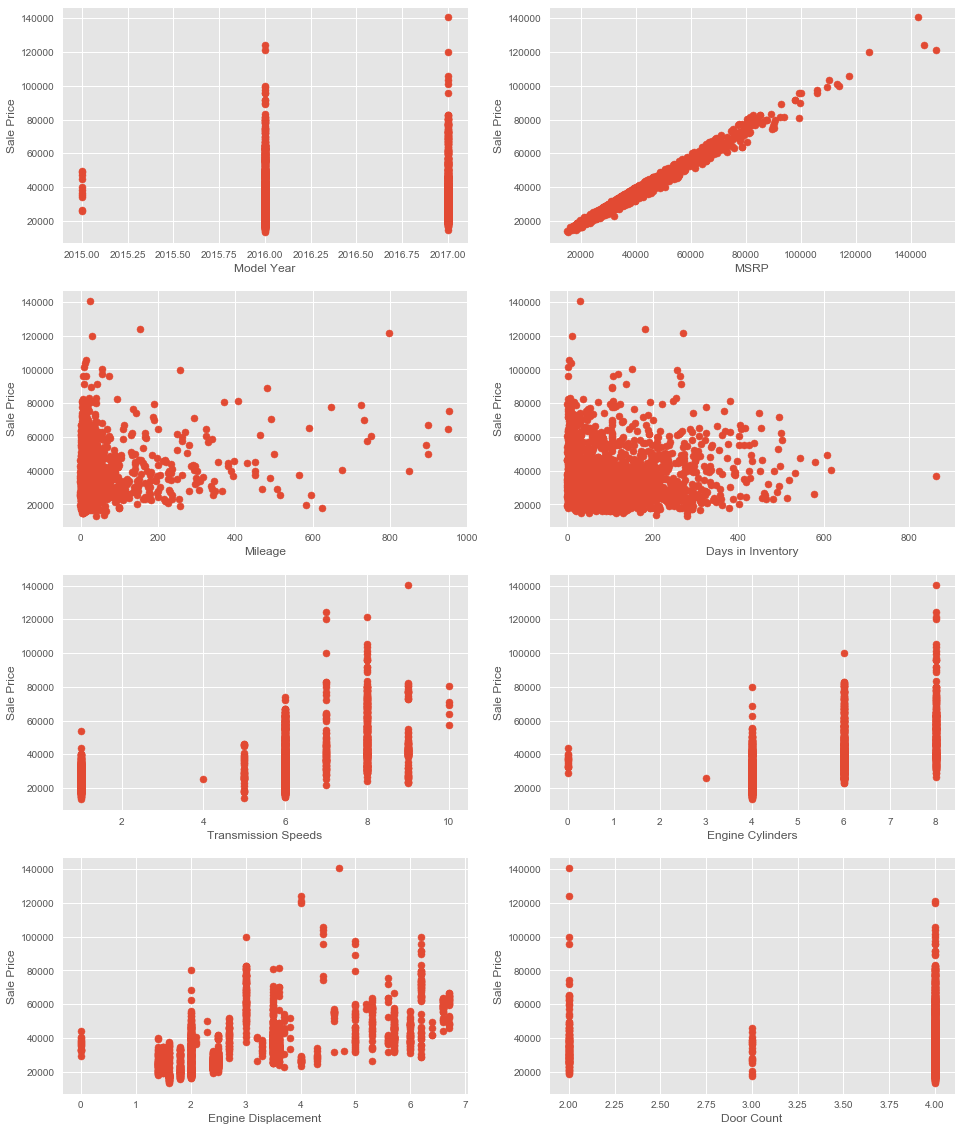

In [215]:
plot_columns = ['model_year', 'msrp_amount', 'mileage', 'days_in_inventory',
                'transmission_num_of_speeds', 'engine_cylinders', 'engine_displacement', 'door_count']

fig, ax = plt.subplots(4, 2, figsize=(16,20))
# plt.tight_layout()
ax[0][0].scatter(df.model_year, df.sale_price_amount)
ax[0][0].set_xlabel('Model Year')
ax[0][0].set_ylabel('Sale Price')
ax[0][1].scatter(df.msrp_amount, df.sale_price_amount)
ax[0][1].set_xlabel('MSRP')
ax[0][1].set_ylabel('Sale Price')
ax[1][0].scatter(df.mileage, df.sale_price_amount)
ax[1][0].set_xlabel('Mileage')
ax[1][0].set_ylabel('Sale Price');
ax[1][1].scatter(df.days_in_inventory, df.sale_price_amount)
ax[1][1].set_xlabel('Days in Inventory')
ax[1][1].set_ylabel('Sale Price')
ax[2][0].scatter(df.transmission_num_of_speeds, df.sale_price_amount)
ax[2][0].set_xlabel('Transmission Speeds')
ax[2][0].set_ylabel('Sale Price')
ax[2][1].scatter(df.engine_cylinders, df.sale_price_amount)
ax[2][1].set_xlabel('Engine Cylinders')
ax[2][1].set_ylabel('Sale Price')
ax[3][0].scatter(df.engine_displacement, df.sale_price_amount)
ax[3][0].set_xlabel('Engine Displacement')
ax[3][0].set_ylabel('Sale Price')
ax[3][1].scatter(df.door_count, df.sale_price_amount)
ax[3][1].set_xlabel('Door Count')
ax[3][1].set_ylabel('Sale Price');

In [324]:
np.log(df.sale_price_amount.values)

array([  9.99441816,  10.54781207,  10.10287106, ...,  10.57849622,
        10.74845198,   9.92988603])

In [329]:
from sklearn.model_selection import train_test_split
X = df[cols].iloc[:, :-1].values
y = df['sale_price_amount'].values
# y = np.log(df.sale_price_amount.values)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(Xtrain, ytrain)
ytrain_pred = slr.predict(Xtrain)
ytest_pred = slr.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

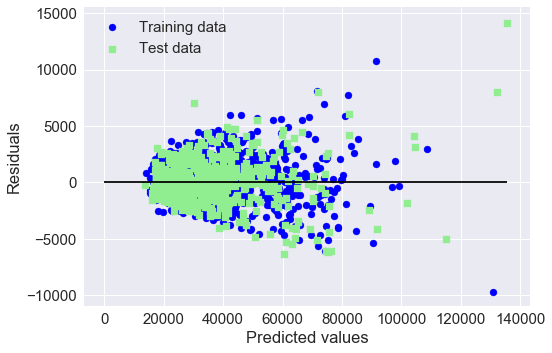

In [336]:
plt.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', marker='o', label='Training data')
plt.scatter(ytest_pred, ytest_pred - ytest,
           c = 'lightgreen', marker='s', label='Test data')
plt.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend();

In [333]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_score = slr.score(Xtrain, ytrain)
test_score = slr.score(Xtest, ytest)
print('Training score: {}'.format(train_score))
print('Test score: {}'.format(test_score))
print('MSE Training: {}, MES Test: {}'.format(mean_squared_error(ytrain, ytrain_pred), mean_squared_error(ytest, ytest_pred)))
print('R2 Score train: {} /nR2 Score test: {}'.format(r2_score(ytrain, ytrain_pred), r2_score(ytest, ytest_pred)))

Training score: 0.9866505769602247
Test score: 0.984122292208763
MSE Training: 2977463.575845526, MES Test: 4051225.5904471884
R2 Score train: 0.9866505769602247 /nR2 Score test: 0.984122292208763


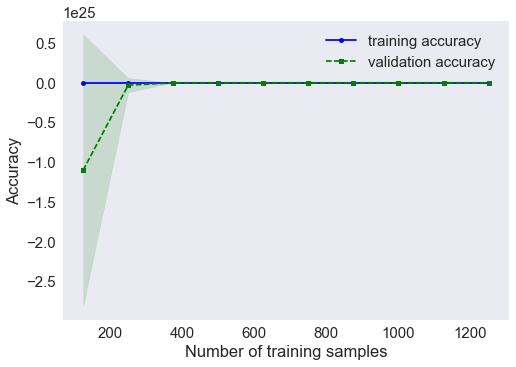

In [345]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA()),
                   ('lm', LinearRegression())])
pipe_lr.fit(Xtrain, ytrain)
pipe_lr.score(Xtest, ytest)
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=Xtrain,
                                                       y=ytrain,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend();